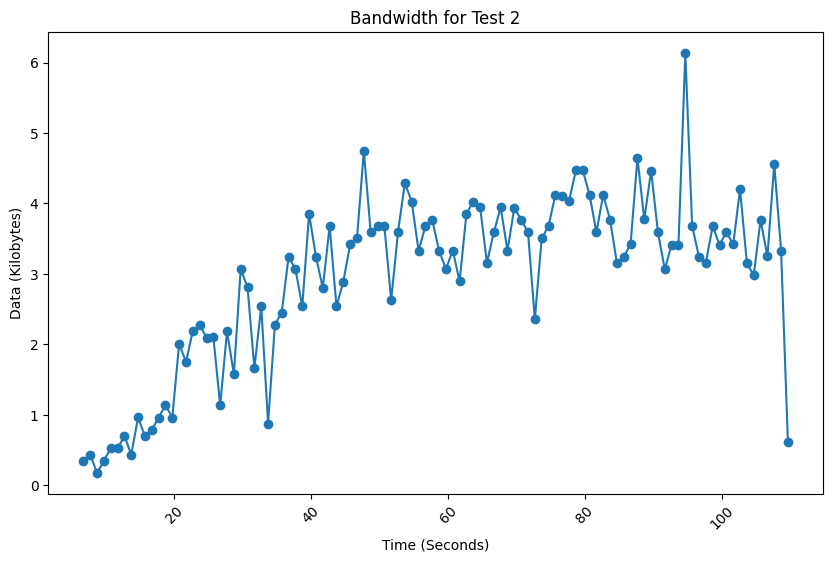

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Open the files
file_path = '../server/logFile.txt'

with open(file_path, 'r') as file:
    data = file.read()

program_start_time = float(data.split('\n')[0].split(': ')[1])

# Remove the first line
data = '\n'.join(data.split('\n')[1:])

df = pd.read_csv(StringIO(data), sep="\s+", header=None, names=["Time", "EventTime", "Bytes"])

# Convert nanosecond to seconds by rounding down and then subtract program start time
df['Second'] = df['Time'].astype(int) - program_start_time


# Sum bytes read per second
bytes_per_second = df.groupby('Second')['Bytes'].sum().reset_index()

# Convert bytes to kilobytes (KB)
bytes_per_second['Bytes'] = bytes_per_second['Bytes'] / 1024
bytes_per_second.rename(columns={'Bytes': 'Kilobytes'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(bytes_per_second['Second'], bytes_per_second['Kilobytes'], marker='o')
plt.title('Bandwidth for Test 2')
plt.xlabel('Time (Seconds)')
plt.ylabel('Data (Kilobytes)')
plt.grid(False)
plt.xticks(rotation=45)
# plt.tight_layout()

# Display plot
plt.show()
